In [1]:
import pandas as pd
import numpy as np
import os

In [25]:
os.getcwd()

'/Users/mutiihaha/Desktop/DataScience/dataSource/mineral'

In [26]:
os.chdir('/Users/mutiihaha/Desktop/DataScience/dataSource/mineral/')

In [260]:
dataProduksi = pd.read_csv('produksiMineral.csv')
len(dataProduksi)

638

In [261]:
dataProduksiKtr = dataProduksi[dataProduksi.isnull().any(axis=1)] #tampilkan semua kolom
                                                                     #1 column, 0 row
print(dataProduksiKtr.head())
print('terdapat',len(dataProduksiKtr),'data yang memiliki nilai null')

             nama_perusahaan     komoditas satuan  tahun  nilai
19  Gunung Kikara Mining, PT    Tin conct.    ton   2000    NaN
20  Gunung Kikara Mining, PT     Tin metal    ton   2000    NaN
22         Lusang Mining, PT  Dore bullion     kg   2000    NaN
23         Lusang Mining, PT          Gold     kg   2000    NaN
24         Lusang Mining, PT        Silver     kg   2000    NaN
terdapat 283 data yang memiliki nilai null


hapus data dg nilai null untuk mendapatkan hasil yg analisis yg lebih akurat

In [262]:
dataProduksi = dataProduksi.dropna(axis=0, how='any')

In [263]:
len(dataProduksi)

355

In [264]:
dataProduksi.count()

nama_perusahaan    355
komoditas          355
satuan             355
tahun              355
nilai              355
dtype: int64

In [265]:
dataProduksi.columns

Index(['nama_perusahaan', 'komoditas', 'satuan', 'tahun', 'nilai'], dtype='object')

In [266]:
dataProduksi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 635
Data columns (total 5 columns):
nama_perusahaan    355 non-null object
komoditas          355 non-null object
satuan             355 non-null object
tahun              355 non-null int64
nilai              355 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.6+ KB


## Kategorisasi

In [267]:
#melakukan penggabungan value/category pada 
#    - nama_perusahaan
#    - komoditas
#    - satuan
#    - tahun

In [268]:
dataProduksi.nama_perusahaan = dataProduksi.nama_perusahaan.astype('category')
namaPerusahaan = dataProduksi.nama_perusahaan.cat.categories

dataProduksi.komoditas = dataProduksi.komoditas.astype('category')
komoditas = dataProduksi.komoditas.cat.categories

dataProduksi.satuan = dataProduksi.satuan.astype('category')
satuan = dataProduksi.satuan.cat.categories

dataProduksi.tahun = dataProduksi.tahun.astype('category')
tahun = dataProduksi.tahun.cat.categories

print(dataProduksi)

                   nama_perusahaan       komoditas satuan tahun      nilai
0            Aneka Tambang Tbk, PT      Nickel ore    wmt  2000  3038809.0
1            Aneka Tambang Tbk, PT         - Ni-Lg    wmt  2000   931355.0
2            Aneka Tambang Tbk, PT         - Ni-Hg    wmt  2000  2107454.0
3            Aneka Tambang Tbk, PT    Ferro nickel     mt  2000    47749.0
4            Aneka Tambang Tbk, PT     Ni In Fe Ni    ton  2000    10111.0
5            Aneka Tambang Tbk, PT            Gold     kg  2000     4210.0
6            Aneka Tambang Tbk, PT          Silver     kg  2000    28587.0
7            Aneka Tambang Tbk, PT         Bauxite     mt  2000  1150776.0
8            Aneka Tambang Tbk, PT       Iron sand    wmt  2000   489132.0
9                    Timah Tbk, PT      Tin conct.    ton  2000    40050.0
10                   Timah Tbk, PT       Tin metal    ton  2000    35550.0
11          Freeport Indonesia, PT   Copper conct.    dmt  2000  2522670.0
12          Freeport Indo

# CONVERTING int - 'tahun' to str

In [275]:
dataProduksi.tahun = dataProduksi.tahun.apply(str)
dataProduksi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 635
Data columns (total 5 columns):
nama_perusahaan    355 non-null category
komoditas          355 non-null category
satuan             355 non-null category
tahun              355 non-null category
nilai              355 non-null float64
dtypes: category(4), float64(1)
memory usage: 9.0 KB


## STATISTIKA

In [276]:
dataProduksiSum = dataProduksi.nilai.sum()
dataProduksiMin = dataProduksi.nilai.min()
dataProduksiMax = dataProduksi.nilai.max()
dataProduksiMean = dataProduksi.nilai.mean()
dataProduksiMedian = dataProduksi.nilai.median()
dataProduksiMode = dataProduksi.nilai.mode()

# GROUPING

In [277]:
dataProduksi.groupby(['nama_perusahaan','komoditas']).mean()

nilai
nama_perusahaan               komoditas                   
Aneka Tambang Tbk, PT         - Ni-Hg         3.417082e+06
                              - Ni-Lg         1.173039e+06
                              Bauxite         1.203504e+06
                              Conv matte               NaN
                              Copper                   NaN
                              Copper conct.            NaN
                              Diamond                  NaN
                              Dore bullion             NaN
                              Ferro nickel    4.021533e+04
                              Gold            3.463700e+03
                              Granite                  NaN
                              Iron sand       2.442657e+05
                              Ni In Fe Ni     1.132020e+04
                              Ni+Co in matte           NaN
                              Nickel ore      4.590131e+06
                              Silver          2.648920e+04
                              Tin conct.               NaN
                              Tin metal                NaN
Avocet Bolaang Mongondouw, PT - Ni-Hg                  NaN
                              - Ni-Lg                  NaN
                              Bauxite                  NaN
                              Conv matte               NaN
                              Copper                   NaN
                              Copper conct.            NaN
                              Diamond                  NaN
                              Dore bullion    1.570333e+03
                              Ferro nickel             NaN
                              Gold            1.379167e+03
                              Granite                  NaN
                              Iron sand                NaN
...                                                    ...
Nusa Halmahera Minerals, PT   Diamond                  NaN
                              Dore bullion    1.641391e+04
                              Ferro nickel             NaN
                              Gold            7.079909e+03
                              Granite                  NaN
                              Iron sand                NaN
                              Ni In Fe Ni              NaN
                              Ni+Co in matte           NaN
                              Nickel ore               NaN
                              Silver          7.629909e+03
                              Tin conct.               NaN
                              Tin metal                NaN
Timah Tbk, PT                 - Ni-Hg                  NaN
                              - Ni-Lg                  NaN
                              Bauxite                  NaN
                              Conv matte               NaN
                              Copper                   NaN
                              Copper conct.            NaN
                              Diamond                  NaN
                              Dore bullion             NaN
                              Ferro nickel             NaN
                              Gold                     NaN
                              Granite                  NaN
                              Iron sand                NaN
                              Ni In Fe Ni              NaN
                              Ni+Co in matte           NaN
                              Nickel ore               NaN
                              Silver                   NaN
                              Tin conct.      4.194309e+04
                              Tin metal       4.055700e+04

[234 rows x 1 columns]

In [278]:
dataProduksi.groupby('satuan').max()

,nilai
satuan,
crt,46856.0
dmt,2851190.0
kg,227406.0
mt,1501937.0
ton,5941393.0
wmt,7112870.0


## rata-rata produksi berdasarkan jenis mineral

Text(0, 0.5, 'Jumlah Produksi')

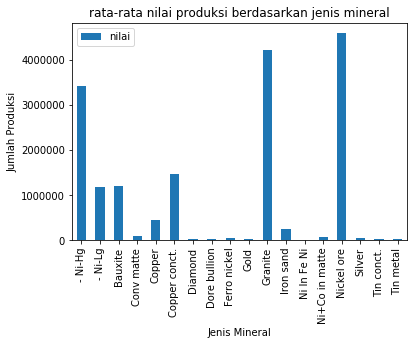

In [279]:
jenisMin = dataProduksi.groupby(['komoditas']).mean()
jenisMin = jenisMin.plot(kind='bar', title='rata-rata nilai produksi berdasarkan jenis mineral')
jenisMin.set_xlabel('Jenis Mineral')
jenisMin.set_ylabel('Jumlah Produksi')

## produksi mineral Nickel ore tiap tahunnya

           nama_perusahaan   komoditas satuan tahun      nilai
0    Aneka Tambang Tbk, PT  Nickel ore    wmt  2000  3038809.0
58   Aneka Tambang Tbk, PT  Nickel ore    wmt  2001  3619141.0
116  Aneka Tambang Tbk, PT  Nickel ore    wmt  2002  4366325.0
174  Aneka Tambang Tbk, PT  Nickel ore    wmt  2003  4395429.0
232  Aneka Tambang Tbk, PT  Nickel ore    wmt  2004  4095478.0
290  Aneka Tambang Tbk, PT  Nickel ore    wmt  2005  2545580.0
348  Aneka Tambang Tbk, PT  Nickel ore    wmt  2006  4353832.0
406  Aneka Tambang Tbk, PT  Nickel ore    wmt  2007  7112870.0
464  Aneka Tambang Tbk, PT  Nickel ore    wmt  2008  6571764.0
522  Aneka Tambang Tbk, PT  Nickel ore    wmt  2009  5802080.0

nilai standar deviasi: 1478664.15
nilai rata-rata: 4590130.8


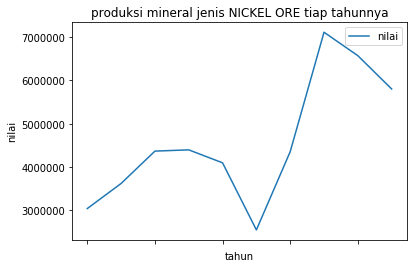

In [280]:
import statistics
#NickelOre = dataProduksi.loc[dataProduksi.komoditas == 'Nickel ore']
NickelOre = dataProduksi[dataProduksi.komoditas == 'Nickel ore']

stdevNO = statistics.stdev(NickelOre.nilai)
meanNO = statistics.mean(NickelOre.nilai)

s = NickelOre.plot.line(x='tahun',y='nilai', title='produksi mineral jenis NICKEL ORE tiap tahunnya')
s.set_xlabel('tahun')
s.set_ylabel('nilai')

print(NickelOre)

print ('\nnilai standar deviasi:',round(stdevNO,2))
print ('nilai rata-rata:',meanNO)

## jumlah produksi mineral tiap perusahaan sejak 2000-2010

Text(0, 0.5, 'jumlah produksi')

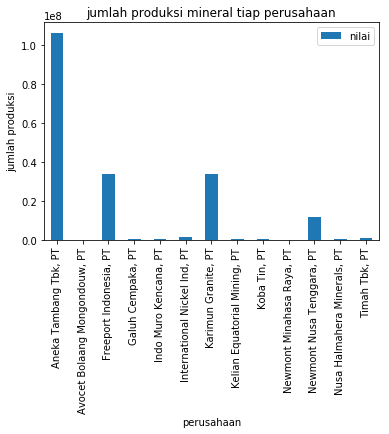

In [281]:
perusahaan = dataProduksi.groupby('nama_perusahaan').sum()
perusahaan = perusahaan.plot(kind='bar', title='jumlah produksi mineral tiap perusahaan')
perusahaan.set_xlabel('perusahaan')
perusahaan.set_ylabel('jumlah produksi')

## total produksi tiap jenis mineral pada PT. ABM

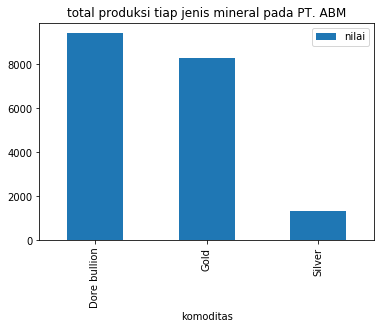

In [282]:
dataperusahaanABM = dataProduksi[dataProduksi.nama_perusahaan=='Avocet Bolaang Mongondouw, PT']
perusahaanABMNew = dataperusahaanABM.copy()
perusahaanABM = perusahaanABMNew.groupby('komoditas').sum()
perusahaanABM[perusahaanABM.isnull().any(axis=1)]

perusahaanABM = perusahaanABM[perusahaanABM.nilai!=0.0]
perusahaanABM = perusahaanABM.plot(kind='bar', title='total produksi tiap jenis mineral pada PT. ABM')

### JUMLAH PRODUKSI TIAP JENIS MINERAL PADA PT. ANEKA TAMBANG

In [303]:
perusahaanAT = dataProduksi[dataProduksi.nama_perusahaan=='Aneka Tambang Tbk, PT']
perusahaanAT = perusahaanAT.groupby(['komoditas','tahun']).mean()
perusahaanAT[perusahaanAT.isnull().any(axis=1)]

dataProduksi = dataProduksi.dropna(axis=0, how='any')
perusahaanAT = perusahaanAT.dropna(axis=0, how='any')
SumAT = perusahaanAT.groupby(['komoditas']).sum()
SumAT.sort_values(by='nilai', ascending=False)

,nilai
komoditas,
Nickel ore,45901308.0
- Ni-Hg,34170825.0
Bauxite,12035041.0
- Ni-Lg,11730393.0
Iron sand,1709860.0
Silver,264892.0
Ferro nickel,241292.0
Ni In Fe Ni,113202.0
Gold,34637.0


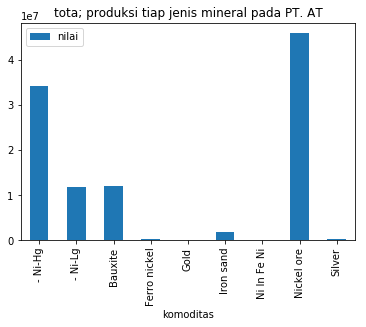

In [284]:
perusahaanAT = perusahaanAT.groupby(['komoditas']).sum()
perusahaanAT = perusahaanAT.plot(kind='bar',title='tota; produksi tiap jenis mineral pada PT. AT')

## 3 jenis mineral yg diproduksi oleh banyak PT

In [293]:
#gold, silver, dore bullion
data3Produksi = dataProduksi[(dataProduksi.komoditas=='Gold')|(dataProduksi.komoditas=='Silver')|(dataProduksi.komoditas=='Dore bullion')]
data3Produksi

,nama_perusahaan,komoditas,satuan,tahun,nilai
5,"Aneka Tambang Tbk, PT",Gold,kg,2000,4210.0
6,"Aneka Tambang Tbk, PT",Silver,kg,2000,28587.0
13,"Freeport Indonesia, PT",Gold,kg,2000,77121.0
14,"Freeport Indonesia, PT",Silver,kg,2000,136931.0
34,"Kelian Equatorial Mining, PT",Dore bullion,kg,2000,21586.0
35,"Kelian Equatorial Mining, PT",Gold,kg,2000,10516.0
36,"Kelian Equatorial Mining, PT",Silver,kg,2000,10145.0
37,"Indo Muro Kencana, PT",Dore bullion,kg,2000,40297.0
38,"Indo Muro Kencana, PT",Gold,kg,2000,3002.0
39,"Indo Muro Kencana, PT",Silver,kg,2000,37295.0


### GOLD

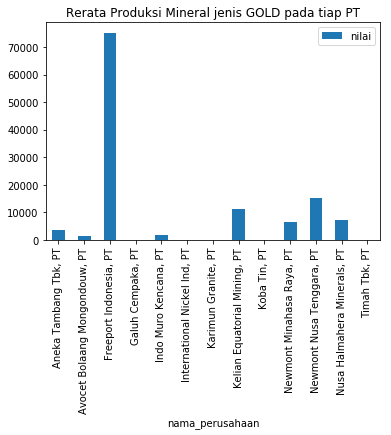

In [294]:
Gold = dataProduksi[dataProduksi.komoditas=='Gold']
GAve = Gold.groupby('nama_perusahaan').mean()
GAve = GAve.plot(kind='bar', title='Rerata Produksi Mineral jenis GOLD pada tiap PT')

### SILVER

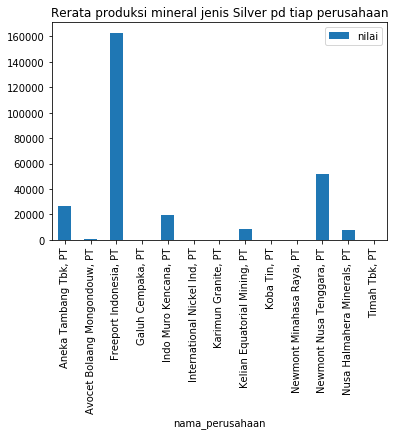

In [296]:
Silver = dataProduksi[dataProduksi.komoditas=='Silver']
SAve = Silver.groupby('nama_perusahaan').mean()
SAve = SAve.plot(kind='bar', title = 'Rerata produksi mineral jenis Silver pd tiap perusahaan')

### DORE BULLION

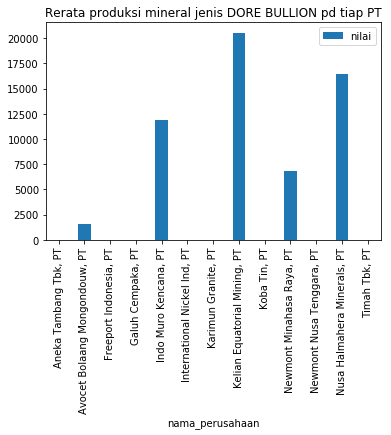

In [299]:
DB = dataProduksi[dataProduksi.komoditas=='Dore bullion']
DBAve = DB.groupby('nama_perusahaan').mean()
DBAve = DBAve.plot(kind='bar', title='Rerata produksi mineral jenis DORE BULLION pd tiap PT')

## sorting jenis2 mineral terbanyak - descending

In [238]:
tes = dataProduksi.groupby('komoditas').sum()
tes.sort_values(by='nilai',ascending=False)

,tahun,nilai
komoditas,,
Nickel ore,20045,45901308.0
- Ni-Hg,20045,34170825.0
Granite,16028,33773032.0
Copper conct.,44110,32417538.0
Bauxite,20045,12035041.0
- Ni-Lg,20045,11730393.0
Copper,44110,9622447.0
Silver,126316,2922300.0
Iron sand,14021,1709860.0


# ANALISA

    > produksi mineral terbanyak diperoleh Perusahaan Aneka Tambang
      dan mineral yg paling banyak diproduksi oleh PT tsb adalah jenis
      Nickel ore, Ni-Hg, Bauxite yg hanya diproduksi oleh PT tsb saja
    
    > untuk jenis mineral yg diproduksi oleh banyak PT adalah:
    - gold & silver : plg banyak diproduksi o/ PT Freeport Indonesia
    - dore bullion : plg banyak diproduksi oleh PT Kelian Equitorial M
    
    > sedangkan untuk PT. Aneka Tambang memproduksi Gold, silver dan dore
      bullion dengan jumlah yg sangat kecil dibanding dg PT Freeport Indo
      dan PT Kellian.  
    > jadi kemungkinan besar, jenis Gold, Silver dan Dore bullion sangatlah langka, dan PT aneka tambang hanya memproduksi jenis mineral dg kualitas rendah. ataupun sebaliknya. 
    
    PT. Aneka Tambang memGold, Silver, Dore bullion merupakan jenis mineral dg kualitas rendah